In [866]:
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")
from itertools import chain
import pandas as pd
import numpy as np
from numpy import array_split, random

import math
from math import sqrt

#### Dataset for Linear Regression

In [867]:
df = pd.read_csv('regression.csv')
df
# print(df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Splitting the Dataset into 80:20 ratio storing into train and test variables

In [868]:
def train_test_split(data):
    np.random.seed(0)
    split_ratio = np.random.rand(len(data))<0.8
    train_data = data[split_ratio]
    test_data = data[~split_ratio] 
    return train_data, test_data
train,test = train_test_split(df)

In [869]:
# Training Dataset for Logostic Regression
train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [870]:
Y_train = train['Y']
del train['Y']

In [871]:
train.shape

(1260, 11)

In [872]:
# Adding a constant column for calculating the bias value
const = pd.DataFrame(np.ones((len(train)), dtype=int))
const.shape

(1260, 1)

In [873]:
# Standardizing the training dataset
train = (train - train.mean())/train.std()
train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,-0.541943,0.937211,-1.388543,-0.448168,-0.252032,-0.463947,-0.379277,0.544020,1.323152,-0.575119,-0.951837
1,-0.313756,1.931665,-1.388543,0.036754,0.276195,0.883884,0.612162,0.014752,-0.704480,0.147004,-0.574946
2,-0.313756,1.268696,-1.181518,-0.171070,0.132133,-0.078853,0.221595,0.120606,-0.312035,-0.033527,-0.574946
3,1.625828,-1.383181,1.509800,-0.448168,-0.276042,0.113695,0.401857,0.649874,-0.966110,-0.454766,-0.574946
4,-0.541943,0.937211,-1.388543,-0.448168,-0.252032,-0.463947,-0.379277,0.544020,1.323152,-0.575119,-0.951837
...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.884222,0.495232,-0.974494,-0.448168,-0.444114,1.172705,-0.259102,-0.138735,0.734485,0.989480,-0.857614
1594,-1.226502,0.384737,-0.974494,-0.378893,0.084112,1.557799,-0.078841,-0.990857,0.930707,-0.454766,0.084614
1595,-1.397642,0.108500,-0.870981,-0.240344,-0.588176,2.231715,0.131465,-0.874418,1.388560,0.628419,0.744173
1596,-1.169455,-0.112490,-0.715713,-0.171070,-0.252032,1.268978,-0.199015,-0.546272,0.734485,0.568242,0.555727


In [874]:
train.insert(0, 'const', 1)
train

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,-0.541943,0.937211,-1.388543,-0.448168,-0.252032,-0.463947,-0.379277,0.544020,1.323152,-0.575119,-0.951837
1,1,-0.313756,1.931665,-1.388543,0.036754,0.276195,0.883884,0.612162,0.014752,-0.704480,0.147004,-0.574946
2,1,-0.313756,1.268696,-1.181518,-0.171070,0.132133,-0.078853,0.221595,0.120606,-0.312035,-0.033527,-0.574946
3,1,1.625828,-1.383181,1.509800,-0.448168,-0.276042,0.113695,0.401857,0.649874,-0.966110,-0.454766,-0.574946
4,1,-0.541943,0.937211,-1.388543,-0.448168,-0.252032,-0.463947,-0.379277,0.544020,1.323152,-0.575119,-0.951837
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,1,-0.884222,0.495232,-0.974494,-0.448168,-0.444114,1.172705,-0.259102,-0.138735,0.734485,0.989480,-0.857614
1594,1,-1.226502,0.384737,-0.974494,-0.378893,0.084112,1.557799,-0.078841,-0.990857,0.930707,-0.454766,0.084614
1595,1,-1.397642,0.108500,-0.870981,-0.240344,-0.588176,2.231715,0.131465,-0.874418,1.388560,0.628419,0.744173
1596,1,-1.169455,-0.112490,-0.715713,-0.171070,-0.252032,1.268978,-0.199015,-0.546272,0.734485,0.568242,0.555727


In [876]:
Train = train.to_numpy()
Y_train = Y_train.to_numpy()

In [877]:
Train.shape

(1260, 12)

### Defining the LOSS class

In [880]:
class Loss:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.theta = None 
        self.weights = None 
    # Function for Mean Square Loss
    def cost_function(self,X, y, theta):
        m = len(y) 
        return np.sum((X.dot(theta)-y)**2)/(2*m)
    
    def predict(self,train,weights):
        train = self.X
        Z = np.dot(train,weights)
        Y_pred = self.sigmoid(Z)
        # print(Y_pred.shape)

        return Y_pred
    # Function for Cross Entropy Loss
    def negative_log_likelihood(self,y_actual, y_pred):
        y_actual = self.y
        likelihood = (-1)*np.sum((y_actual*np.log(y_pred))+((1-y_actual)*np.log(1-y_pred)))
        return likelihood

In the above class I implement the Mean Square Loss(named as Cost Function) and Cross Entropy Loss(named as negative_log_likelihood)

## Defining the OPTIMIZATION CLASS

In [881]:
class Optimization:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.epochs= 1000
    
    # def cost_function(self,X, y, theta):
    #     m = len(y) 
    #     return np.sum((X.dot(theta)-y)**2)/(2*m)
    def stocgastic_gradient_descent(self,X, y, theta, alpha=0.01, iterations=100,batchsize=50):
        m = len(y)
        theta_list = []
        cost_list = []
        cost_list.append(1000000)
        theta_final = []
        for iteration in range(iterations):
            idxList = np.random.randint(0, m, size = batchsize)
            batch = np.take(X, idxList, axis=0)
            y_btach = np.take(y, idxList, axis=0)
            y_btach.shape = (batchsize,1)
            for itr in range(len(batch)):
                hypothesis = batch.dot(theta)
                # print(hypothesis.shape)
                loss = hypothesis-y_btach
                # print(loss.shape,"\n")
                gradient = batch.T.dot(loss)/len(y_btach)
                theta = theta - alpha*gradient
                loss_obj = Loss()
                cost = loss_obj.cost_function(batch, y_btach, theta)
                cost_list.append(cost)
                theta_list.append(theta)
            # theta_final.append(theta_list)
            if (cost_list[iteration]-cost_list[iteration+1]) < 1e-6:
                print('stopping in',iteration," iteration")
                break
            # print('iteration {} and cost {}'.format(iteration, cost))
        print(" The final cost value is ", cost)
        return theta_list[-1]

    # def negative_log_likelihood(self,y_actual, y_pred):
    #     likelihood = (-1)*np.sum((y_actual*np.log(y_pred))+((1-y_actual)*np.log(1-y_pred)))
    #     return likelihood

    # def sigmoid(self,z):
    #     sig_z = (1/(1+np.exp(-z)))
    #     return sig_z
        
    # def predict(self,train,weights):
    #     Z = np.dot(train,weights)
    #     Y_pred = self.sigmoid(Z)
    #     # print(Y_pred.shape)
    #     return Y_pred

    def Newton_Raphson(self,weights):
        input_feature = self.X
        y_actual = self.y    
        # print("\nNew Updated Weights:\n")
        loss_list = []
        # weights =np.zeros(shape=(train.shape[1],1)) 
        vec = np.ones(458)
        vec.shape = (458,1)
        # vec.shape
        weight_list = []
        run = True
        i=0
        loss_list.append(1e10)
        y_pred = self.predict(input_feature,weights)  
        learning_rate = 0.01  
        # while run:
        # print(y_pred.shape)
        loss = Loss()
        y_pred  = loss.predict()
        while i<1000:
            grad = (-1)*input_feature.T.dot(y_actual-y_pred)
            # print("\nGradient :\n",grad)
            one_minus_y_pred = vec - y_pred
            # print(one_minus_y_pred)
            element_wise_product = np.multiply(y_pred,one_minus_y_pred)
            element_wise_product = np.squeeze(np.asarray(element_wise_product))
            W = np.diag(element_wise_product)
            # print("\nW Diagnonal Matrix :\n",W)
            H = input_feature.T.dot(W.dot(input_feature))
            # print("Hessian Matrix:\n",H)
            H_inverse = np.linalg.inv(H)
            cross_entropy_loss = loss.negative_log_likelihood(y_actual,y_pred)
            loss_list.append(cross_entropy_loss)
            # print("\nHessian Matrix Inverse:\n",H_inverse)
            # print(loss_list[i])
            if loss_list[i] - loss_list[i+1]<0.000001:
                # print('farjad')
                break
            weights= weights - learning_rate*H_inverse.dot(grad)
            weight_list.append(weights)
            y_pred = self.predict(input_feature,weights)
            i+=1
        # print("\n No of Iterations : ",i)
        loss_list.pop(0)  
            
        return weights


### Class for Logistic Regression and calling Optimization and loss classes within this class

In [882]:
class Logistic:
    def __init__(self,X,y):
        self.X = X
        self.y = y

    def fit(self):
        opt = Optimization(self.X,self.y)
        betas = opt.Newton_Raphson()
        return betas
    
    def predict(self,X,beta):
        Z = np.dot(X,beta)
        Y_pred = (1/(1+np.exp(-Z)))
        # print(Y_pred.shape)
        return Y_pred
 


### Data for Logistic regression

In [883]:
df1 = pd.read_csv('logistic.csv')
df1.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [884]:
# replacing categorical values to numeric values
df1['Y'].replace(['M', 'B'],[1, 0], inplace=True)
df1

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [885]:
train1,test1 = train_test_split(df1)
train1

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115


In [886]:
test1

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720
13,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.840,27.66,112.00,876.5,0.11310,0.19240,0.2322,0.1119,0.2809,0.06287
17,1,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,20.960,31.48,136.80,1315.0,0.17890,0.42330,0.4784,0.2073,0.3706,0.11420
19,0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.1288,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [887]:
Y_train1 = train1['Y']
del train1['Y']
# Y_train1

In [888]:
const1 = pd.DataFrame(np.ones((len(train1)), dtype=int))
const1.shape
train1.insert(0, 'const1', 1)
train1

,const1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.1105,0.2258,0.08004
560,1,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,1,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115


In [889]:
y_train1 = Y_train1.values.reshape(458,1)
y_train1.shape

(458, 1)

In [890]:
weights =np.zeros(shape=(train1.shape[1],1))
weights.shape

(31, 1)

In [891]:
class Logistic:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.weights =np.zeros(shape=(X.shape[1],1))

    def fit(self,weights):
        opt = Optimization(self.X,self.y)
        betas = opt.Newton_Raphson(weights)
        return betas
    
    def predict(self,X,beta):
        Z = np.dot(X,beta)
        Y_pred = (1/(1+np.exp(-Z)))
        # print(Y_pred.shape)
        return Y_pred
 
        

In [892]:
obj = Logistic(train1,y_train1)
new_weights = obj.fit(weights)
print("New Weights after training for Logistic Regression :\n", new_weights)

New Weights after training for Logistic Regression :
 [[-2.45226875e+02]
 [-8.87591661e+00]
 [-6.49773164e-01]
 [-1.30241848e+00]
 [-1.28010425e-02]
 [ 7.50831500e+02]
 [-2.59728211e+02]
 [ 3.39173158e+02]
 [ 7.71826931e+01]
 [ 2.22104277e+01]
 [-6.10425284e+01]
 [-2.50032983e+02]
 [-1.48356791e+01]
 [ 2.01463399e+00]
 [ 2.06965625e+00]
 [ 2.42071495e+03]
 [ 2.88362059e+02]
 [ 1.92706793e+02]
 [ 1.88129089e+03]
 [-1.44507180e+02]
 [-7.73457283e+03]
 [ 2.98910141e+01]
 [ 2.38536107e+00]
 [-7.50671400e-01]
 [-5.85242564e-02]
 [-1.70376876e+02]
 [ 3.91859341e-01]
 [-7.37233533e+01]
 [-2.49823602e+01]
 [ 6.94050479e+01]
 [ 6.52420082e+02]]


In [893]:
def predict(train,weights):
    Z = np.dot(train,weights)
    Y_pred = (1/(1+np.exp(-Z))) 
    # print(Y_pred.shape)
    lis = []
    for i in Y_pred:
        if i>0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis


In [907]:
# print("The predicted values for test set in Logistic Regression Problem:\n")
y_predictions = predict(test1,new_weights)
# y_predictions

Calculating the scores as asked in the paper

In [895]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    confusion_matrix = np.array([[tp,fn],[fp,tn]])
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    accuracy = (tp+tn)/len(y)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score,accuracy,precision,recall,confusion_matrix


The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’. The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.
Therefore if Model A has better F-score than model B then Model a performs better.


In [896]:
y_actual = test1['Y']
# print(y_actual)
y_actual = y_actual.values.tolist()
# print(y_actual)
f1_score,accuracy,precision,recall,confusion_matrix = f1_score(y_actual,y_predictions)
print("F1-Score for Logistic Regression : " , f1_score)
print("Accuracy for Logistic Regression : " , accuracy)
print("Precision for Logistic Regression : " , precision)
print("Recall for Logistic Regression : " , recall)
print("Confusion Matrix : \n", confusion_matrix)

F1-Score for Logistic Regression :  0.4583333333333333
Accuracy for Logistic Regression :  0.2972972972972973
Precision for Logistic Regression :  0.3055555555555556
Recall for Logistic Regression :  0.9166666666666666
Confusion Matrix : 
 [[33  3]
 [75  0]]


Plot the graph for actual and predicted values for Logistic regression

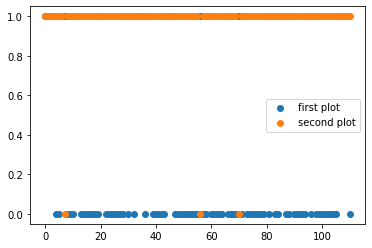

In [897]:
plt.scatter(range(len(y_actual)), y_actual, label='first plot',)
plt.scatter(range(len(y_actual)), y_predictions, label='second plot')
plt.legend()

### Class for Linear Regression and calling Optimization and loss classes within this class

In [898]:
class Linear_Regression:
    def fit(self,X,y):
        self.X = X
        self.y = y
        thetas = np.zeros(12)
        thetas.shape = (12,1)
        obj = Optimization(X,y)
        betas = obj.stocgastic_gradient_descent(X,y,thetas)
        return betas        

    def predict(self,train,weights):
        train = self.X
        Z = np.dot(train,weights)
        Y_pred = self.sigmoid(Z)
        # print(Y_pred.shape)
        return Y_pred
    

In [899]:
obj = Linear_Regression()
thetas = np.zeros(12)
thetas.shape = (12,1)
# print("The cost for each batch iteration:\n")
new_updated_weights = obj.fit(Train, Y_train)
print("The new updated weights for linear regression is :\n",new_updated_weights)

stopping in 50  iteration
 The final cost value is  0.17221899284446823
The new updated weights for linear regression is :
 [[ 5.71143005]
 [ 0.11217449]
 [-0.164827  ]
 [-0.08186159]
 [ 0.05404706]
 [-0.12197996]
 [ 0.02259984]
 [-0.18765622]
 [-0.03401623]
 [ 0.00575522]
 [ 0.17061902]
 [ 0.36155352]]


In [900]:
def predict(train,weights):
    Z = np.dot(train,weights)
    # print(Y_pred.shape)
    return Z

In [901]:
test = (test-test.mean())/test.std()

In [902]:
print("The predicted values for test set in Logistic Regression Problem:\n")
y_predictions_linear = predict(test,new_updated_weights)
y_predictions_linear

The predicted values for test set in Logistic Regression Problem:



array([[-1.98255426e+00],
       [-6.26367332e-01],
       [-1.72741768e+00],
       [-4.75198315e-01],
       [-1.10486816e+00],
       [ 1.81606815e+00],
       [-1.31313843e+00],
       [-8.31573199e+00],
       [-5.05900989e+00],
       [-2.61531000e+00],
       [ 2.94518003e+00],
       [-1.46382927e+00],
       [-1.90715399e+00],
       [-4.41832420e+00],
       [-1.95805072e+00],
       [-7.07257906e-01],
       [-9.73714957e-01],
       [ 6.41478614e-01],
       [-1.56255159e+00],
       [ 3.47749037e-01],
       [ 2.57114890e+00],
       [-3.27978109e+00],
       [ 5.96997782e-01],
       [-6.54276576e+00],
       [-8.99251736e+00],
       [-2.22081303e+00],
       [-1.78679549e-01],
       [ 1.93069354e+00],
       [-4.57335114e+00],
       [-4.58452700e+00],
       [-3.79089339e+00],
       [-4.10683138e+00],
       [-1.71951322e+00],
       [-2.36372696e+00],
       [-4.94431159e+00],
       [-2.27023279e+00],
       [ 9.57809681e+00],
       [ 5.41270290e+00],
       [-1.8

In [903]:
y_actual_linear = test['Y']
# print(y_actual)
y_actual_linear = y_actual_linear.values.tolist()

In [904]:
def rootmeanSquaredError(y,y_pred):
        RMSE = np.sqrt(np.mean(np.square(np.subtract(y,y_pred))))
        return RMSE

In [905]:
rmse = rootmeanSquaredError(y_actual_linear,y_predictions_linear)
print("RMSE : ",rmse)

RMSE :  5.644843601206821


Plot the actual and predicted values for Linear regression

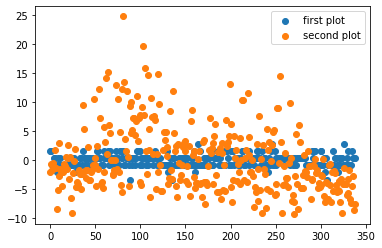

In [906]:
plt.scatter(range(len(y_actual_linear)), y_actual_linear, label='first plot',)
plt.scatter(range(len(y_actual_linear)), y_predictions_linear, label='second plot')
plt.legend()